- **About this file**

Suggest Edits
This is a Dataset for Stock Prediction on Netflix.
This dataset start from 2002to 2021 .
It was collected from Yahoo Finance.
You can perform Time Series Analysis and EDA on data.

 - **Open** -> It is the price at which the financial security opens in the market when trading begins.
 - **High** -> The high is the highest price at which a stock traded during a period.
 - **Low** -> Please enter a descriptLow is the minimum price of a stock in a period ion.
 - **Close** -> Closing price generally refers to the last price at which a stock trades during a regular trading session.
 - **Adj Close** -> The adjusted closing price amends a stock's closing price to reflect that stock's value after accounting for any
 - **Volume** -> Volume measures the number of shares traded in a stock or contracts traded in futures or options.

 https://github.com/sayandas1302/Time-Series-Netflix-Stock-Price-Prediction/blob/main/netflix_pred.ipynb

# Library

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas
import datetime as dt
from pandas.plotting import lag_plot
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
# from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor, BaggingRegressor
from sklearn.linear_model import ElasticNet, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, root_mean_squared_error,mean_absolute_error
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.tsa.stattools import adfuller, kpss, grangercausalitytests
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import kstest_normal
from darts.models import ExponentialSmoothing
from darts import TimeSeries
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import product
import pmdarima as pm
from prophet import Prophet
from statsmodels.tsa.stattools import adfuller, kpss, grangercausalitytests
from statsmodels.tsa.api import VAR


In [1]:
pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install darts

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install prophet

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# Reading Data & EDA

In [6]:
data = pd.read_csv('NFLX.csv',index_col='Date',parse_dates=True)
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


In [8]:
print(data.isna().sum())
print('\nshape: ',data.shape)
print(data.info())
data.describe(include='all')

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

shape:  (4874, 6)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4874 entries, 2002-05-23 to 2021-09-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4874 non-null   float64
 1   High       4874 non-null   float64
 2   Low        4874 non-null   float64
 3   Close      4874 non-null   float64
 4   Adj Close  4874 non-null   float64
 5   Volume     4874 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 266.5 KB
None


,Open,High,Low,Close,Adj Close,Volume
count,4874.000000,4874.000000,4874.000000,4874.000000,4874.000000,4.874000e+03
mean,104.644811,106.243736,103.006660,104.686524,104.686524,1.681687e+07
std,155.886656,158.173217,153.546958,155.940368,155.940368,1.937625e+07
min,0.377857,0.410714,0.346429,0.372857,0.372857,2.856000e+05
25%,3.901429,3.977143,3.835357,3.905714,3.905714,6.301225e+06
50%,21.386429,21.816429,20.935714,21.233572,21.233572,1.084630e+07
75%,125.445000,126.592499,122.987499,125.097502,125.097502,2.016192e+07
max,608.049988,619.000000,608.049988,610.340027,610.340027,3.234140e+08


               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999864  0.999858  0.999708   0.999708 -0.249313
High       0.999864  1.000000  0.999819  0.999868   0.999868 -0.247960
Low        0.999858  0.999819  1.000000  0.999862   0.999862 -0.250610
Close      0.999708  0.999868  0.999862  1.000000   1.000000 -0.249177
Adj Close  0.999708  0.999868  0.999862  1.000000   1.000000 -0.249177
Volume    -0.249313 -0.247960 -0.250610 -0.249177  -0.249177  1.000000


<Axes: >

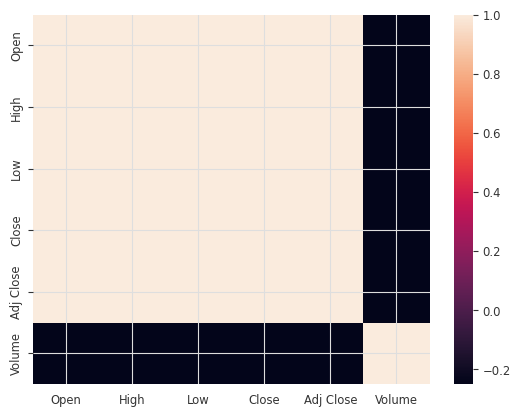

In [10]:
print(data.corr())
sns.heatmap(data.corr())

Text(0.5, 1.0, 'Volume of Stock over time')

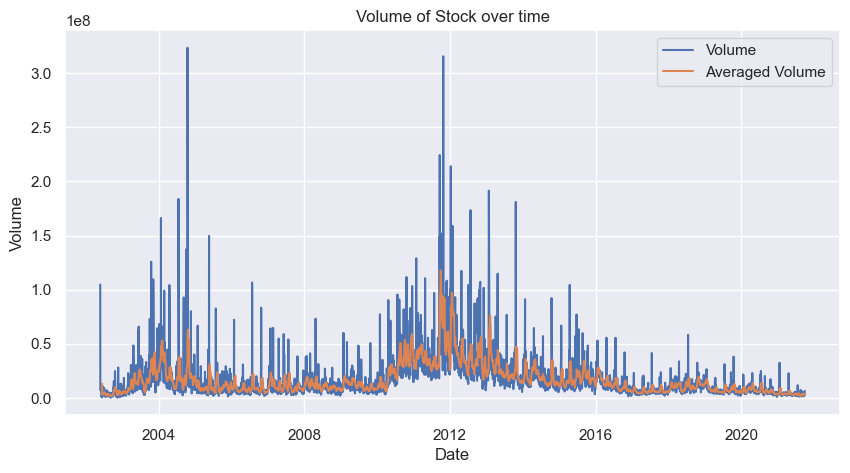

In [25]:
sns.set(rc={'figure.figsize':(10,5)})
sns.lineplot(x=data.index,y=data['Volume'],label='Volume')
sns.lineplot(x= data.index,y= data['Volume'].rolling(window=12).mean(),label = 'Averaged Volume')
plt.title('Volume of Stock over time')
# moving average of 12 months data point


<Axes: xlabel='Date', ylabel='Open'>

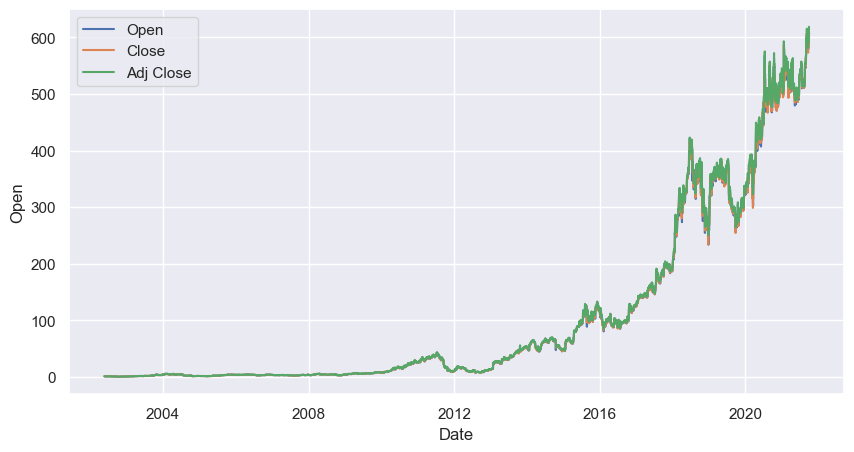

In [31]:
sns.lineplot(x=data.index,y= data['Open'],label='Open')
sns.lineplot(x=data.index,y=data['Close'],label='Close')
sns.lineplot(x=data.index,y=data['High'],label = 'Adj Close')



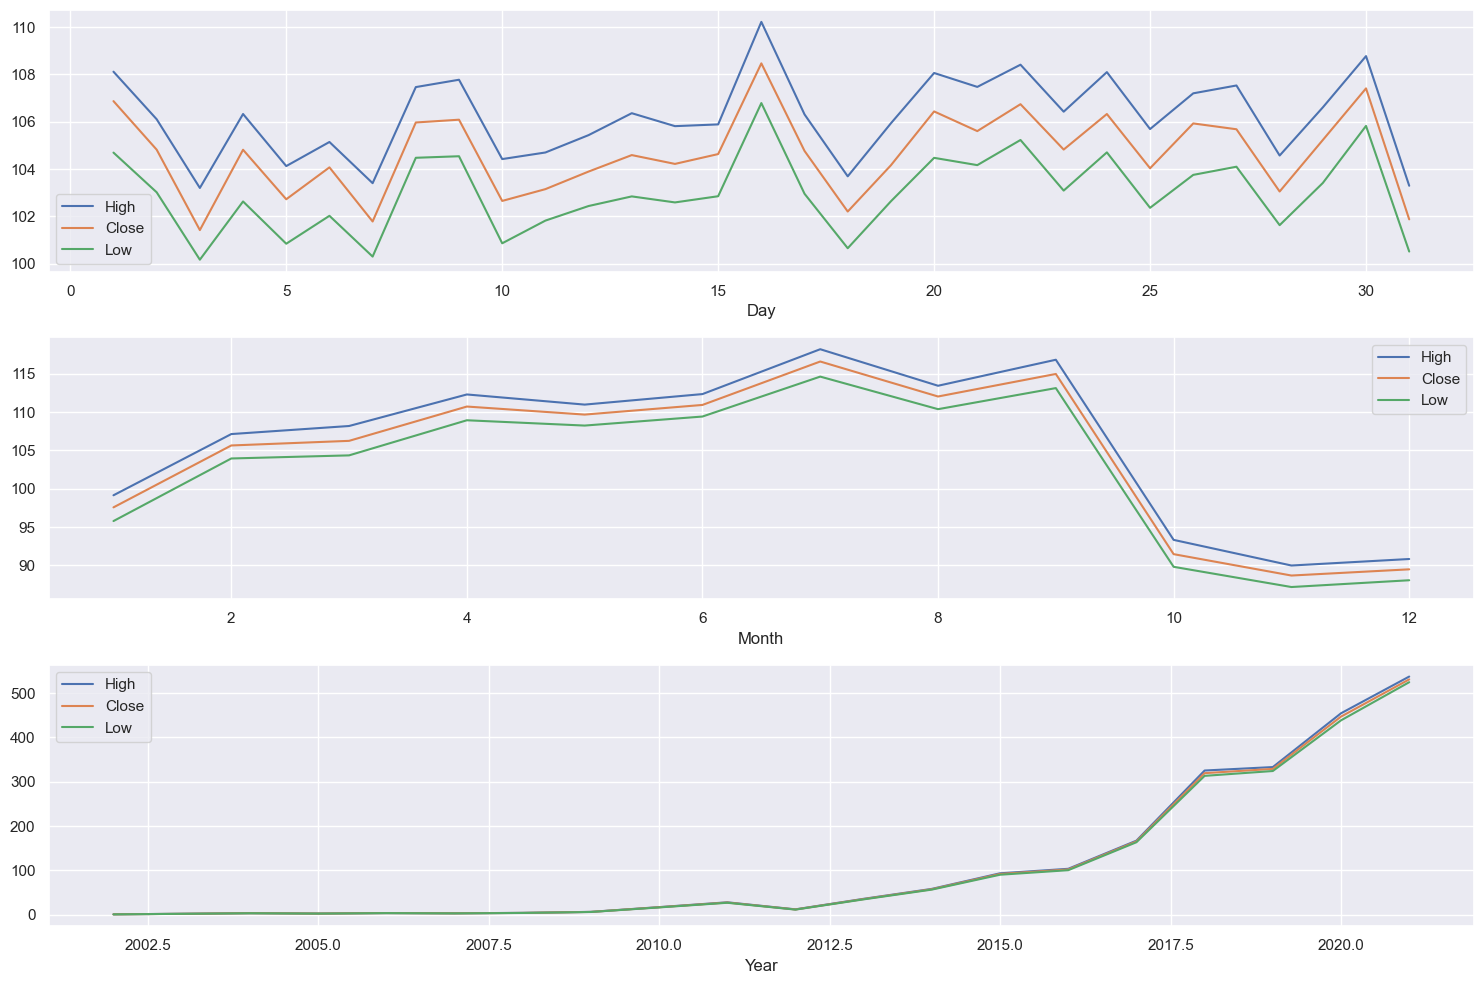

In [43]:
fig, (ax1,ax2,ax3)= plt.subplots(nrows=3,figsize = (15,10))
data.groupby(data.index.day).mean().plot(y = ['High','Close','Low'],ax=ax1,xlabel = 'Day')
data.groupby(data.index.month).mean().plot(y= ['High','Close','Low'],ax = ax2,xlabel = 'Month')
data.groupby(data.index.year).mean().plot(y = ['High','Close','Low'],ax = ax3,xlabel = 'Year')
plt.tight_layout()
plt.show()


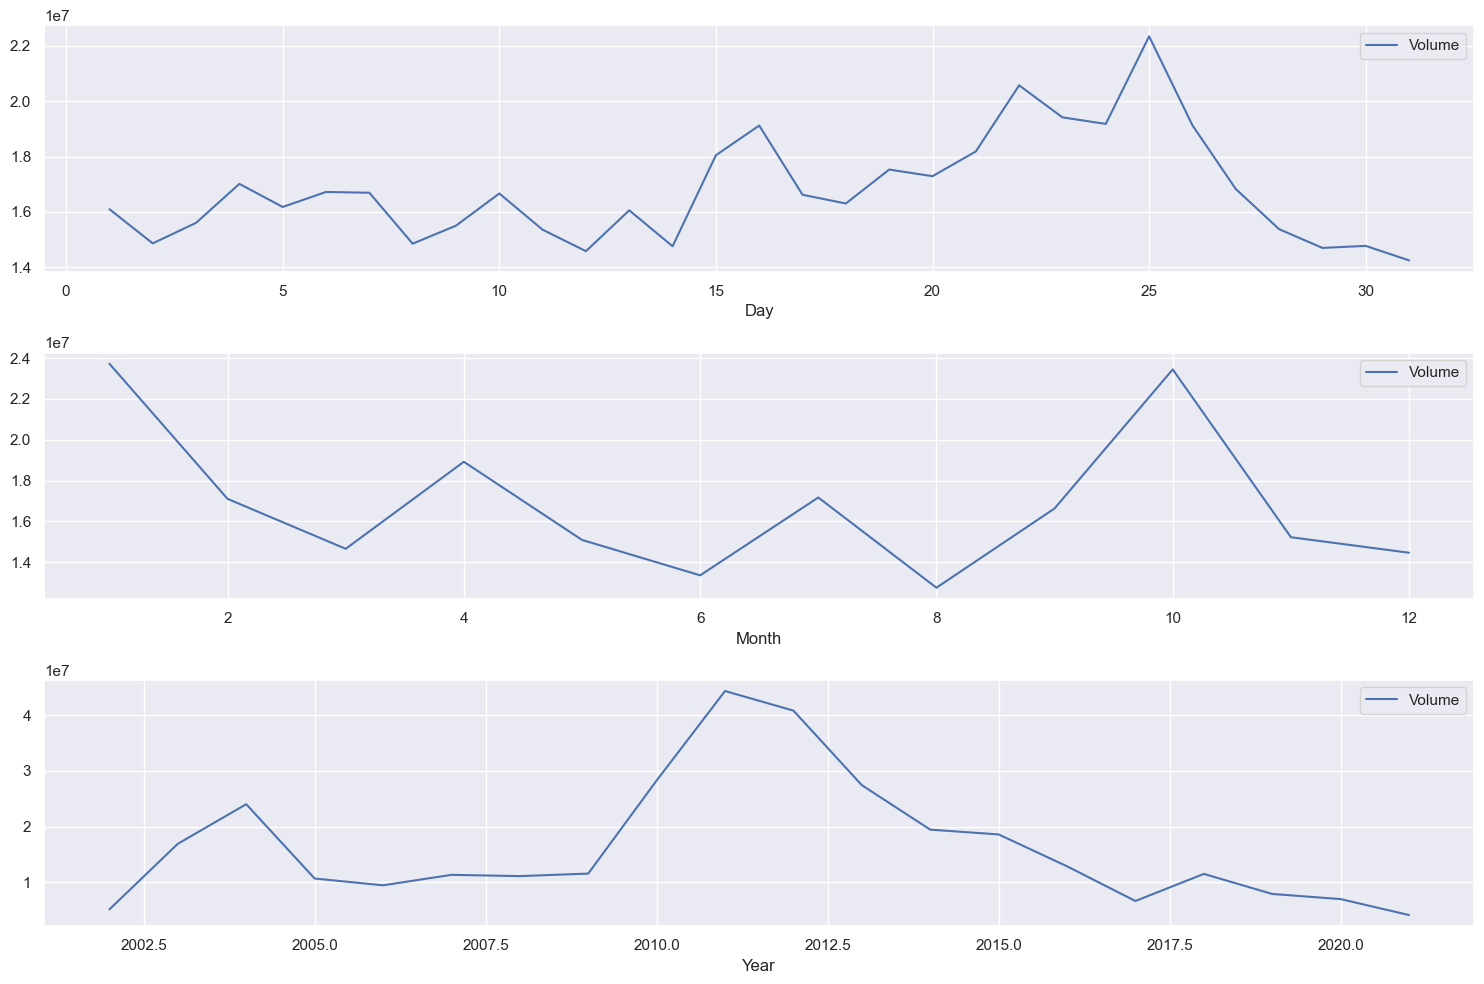

In [48]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=3,figsize = (15,10))
data.groupby(data.index.day).mean().plot(y='Volume',ax=ax1,xlabel='Day')
data.groupby(data.index.month).mean().plot(y='Volume',ax=ax2,xlabel='Month')
data.groupby(data.index.year).mean().plot(y='Volume',ax=ax3,xlabel='Year')
plt.tight_layout()
plt.show()

In [51]:
print(data.shape)

(4874, 6)


In [5]:
data_downSample = data.resample('D').mean()
data_downSample.shape

(7071, 6)

In [6]:
data_downSample.isna().sum().sum()

13182

# Handling missing data with interpolation

In [7]:
data_downSample_ffil = data_downSample.fillna(method='ffill')
data_downSample_bfill = data_downSample.fillna(method='bfill')

C:\Users\u610601\AppData\Local\Temp\ipykernel_3920\1614366538.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_downSample_ffil = data_downSample.fillna(method='ffill')
C:\Users\u610601\AppData\Local\Temp\ipykernel_3920\1614366538.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_downSample_bfill = data_downSample.fillna(method='bfill')


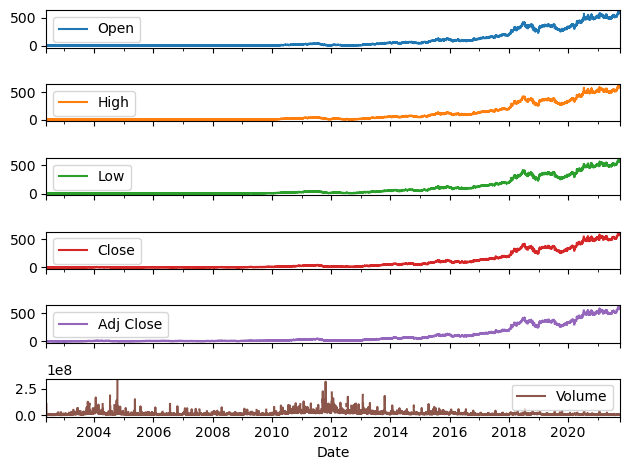

In [8]:
data_downSample.plot(subplots= True)
plt.tight_layout()
plt.show()

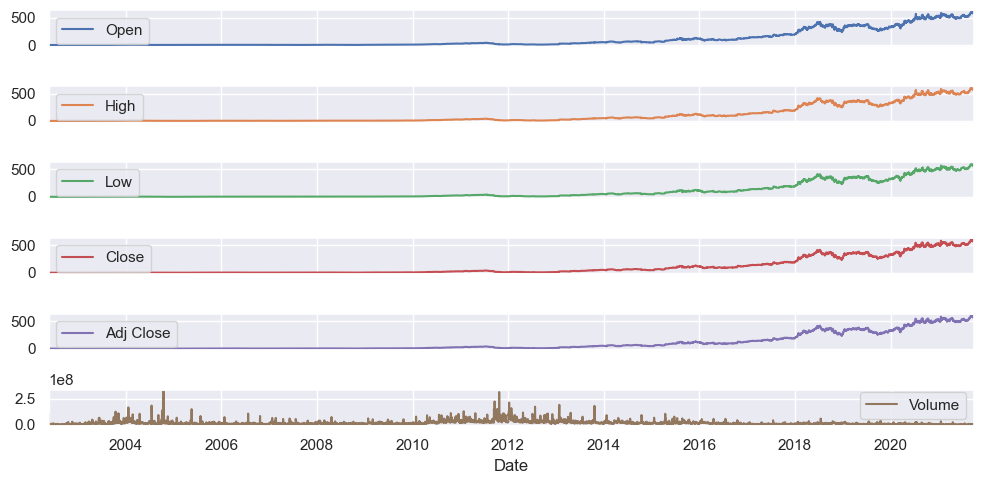

In [69]:
data_downSample_ffil.plot(subplots = True)
plt.tight_layout()
plt.show()


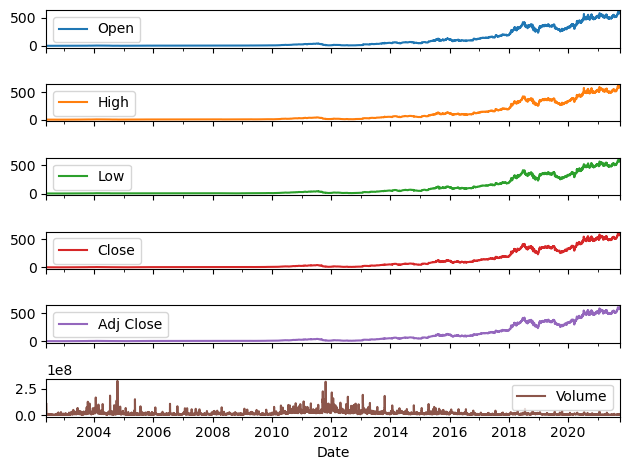

In [9]:
data_downSample_bfill.plot(subplots = True)
plt.tight_layout()
plt.show()

In [11]:
# adding businnes days
data = data.asfreq('b')

In [12]:
data.isna().sum()

Open         177
High         177
Low          177
Close        177
Adj Close    177
Volume       177
dtype: int64

In [13]:
data.fillna(method='bfill',inplace=True)

C:\Users\u610601\AppData\Local\Temp\ipykernel_11900\1664202156.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill',inplace=True)


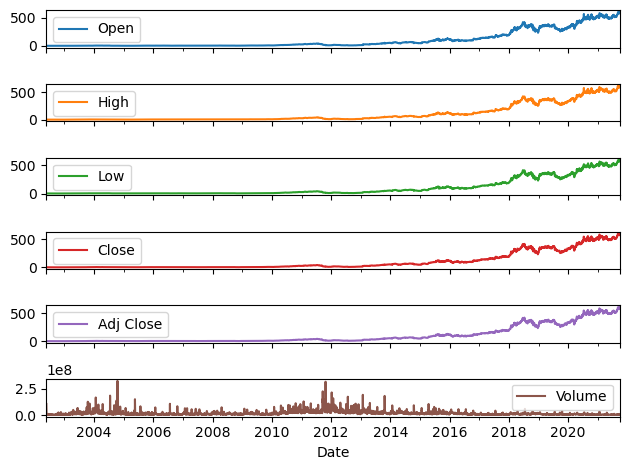

In [13]:
data.plot(subplots=True)
plt.tight_layout()
plt.show()

# Decomposition

In [150]:
data_add = seasonal_decompose(data['Close'],model='additive')
data_mul = seasonal_decompose(data['Close'],model='multiplicative')

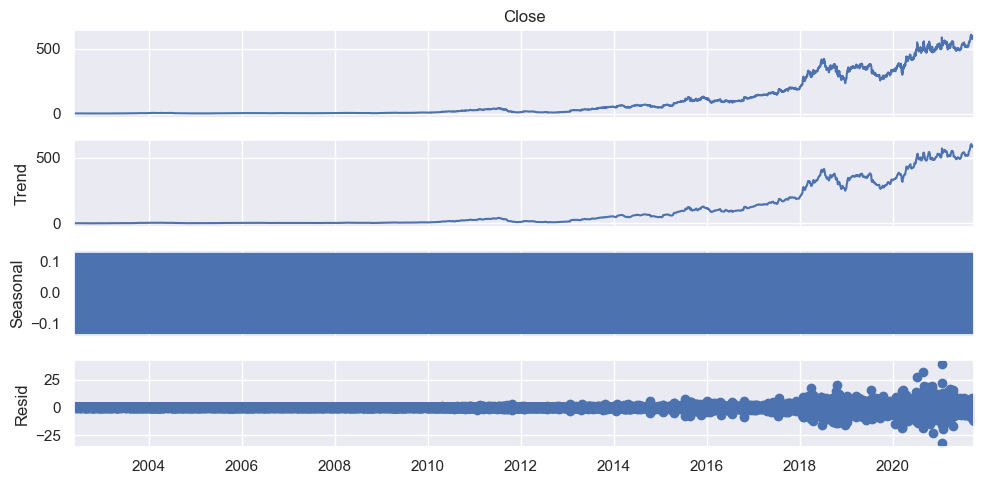

In [151]:
data_add.plot()
plt.tight_layout()
plt.show()

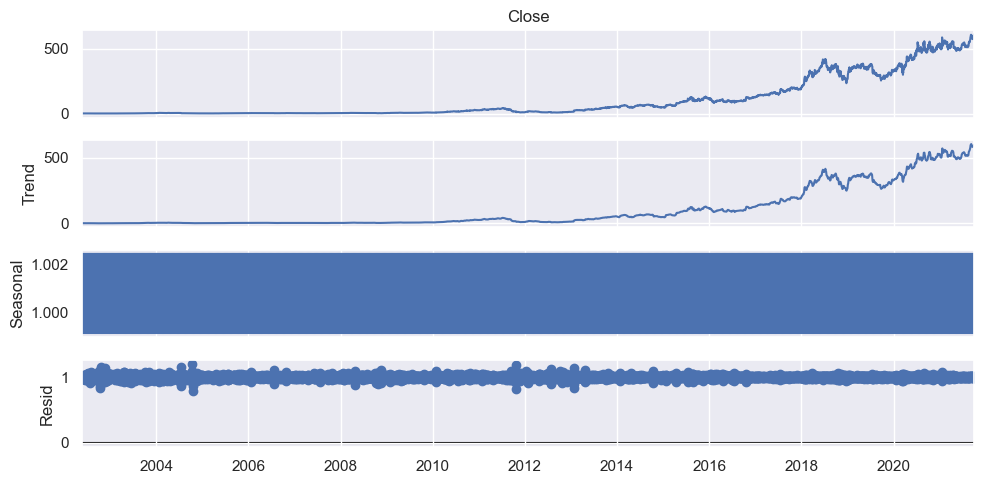

In [152]:
data_mul.plot()
plt.tight_layout()
plt.show()

In [14]:
data_stl = STL(data['Close'], seasonal = 13,robust = True).fit()

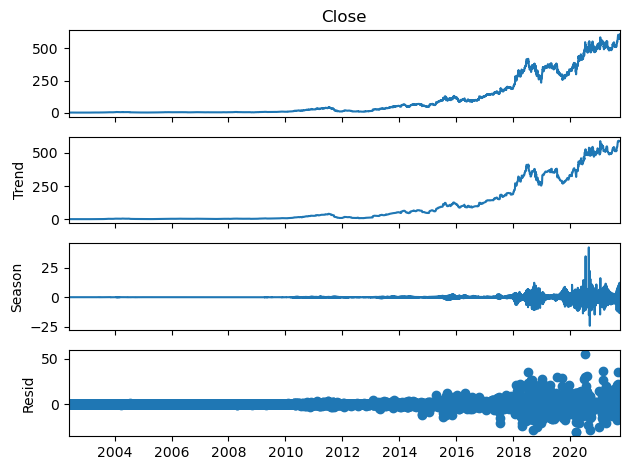

In [15]:
data_stl.plot()
plt.tight_layout()
plt.show()

# Upsampling

In [14]:
data_c = pd.DataFrame(data['Close'],columns=['Close'])
print(data_c.shape)
data_c

(5051, 1)


,Close
Date,
2002-05-23,1.196429
2002-05-24,1.210000
2002-05-27,1.157143
2002-05-28,1.157143
2002-05-29,1.103571
...,...
2021-09-24,592.390015
2021-09-27,592.640015
2021-09-28,583.849976


In [15]:
close_upsample = data_c.resample('W').mean()
print(close_upsample.isna().sum())
close_upsample

Close    0
dtype: int64


,Close
Date,
2002-05-26,1.203215
2002-06-02,1.113143
2002-06-09,1.138857
2002-06-16,1.094429
2002-06-23,0.944143
...,...
2021-09-05,579.304004
2021-09-12,603.145996
2021-09-19,585.153992


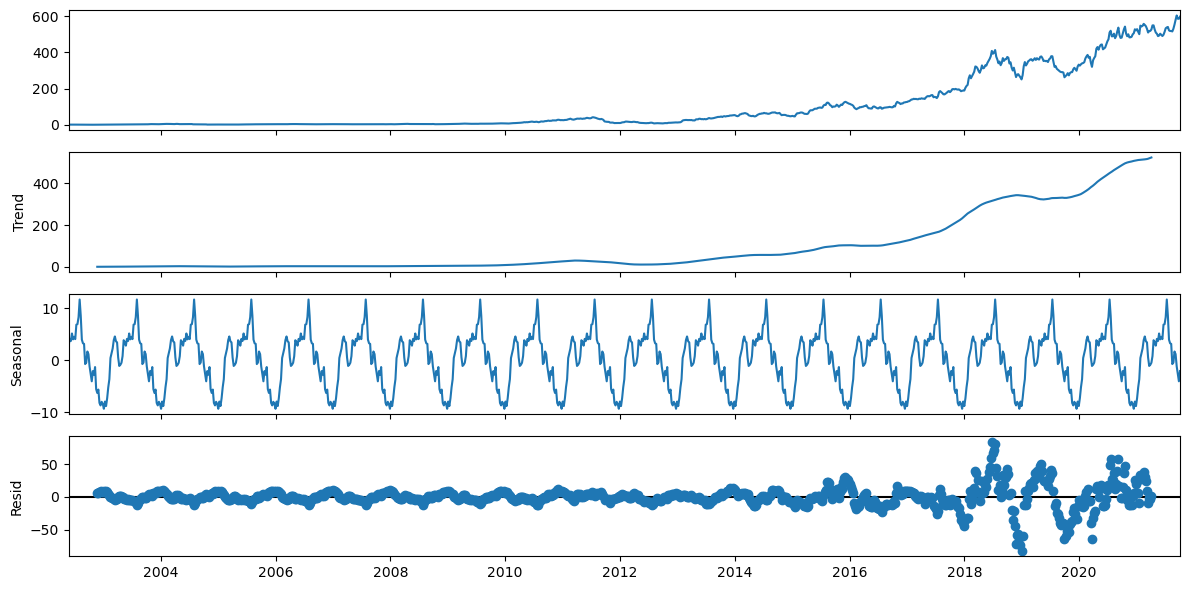

In [32]:
decompose_close_upsample = seasonal_decompose(close_upsample,model = 'additive')
plt.rcParams['figure.figsize'] = (12,6)
decompose_close_upsample.plot()
plt.show()

# Detecting Outliers using Z-score

z-scores is sensitive to normal distribution! as long the data is not distributed normally, we have to use the ***modified version of z-score***.

<Axes: xlabel='Date'>

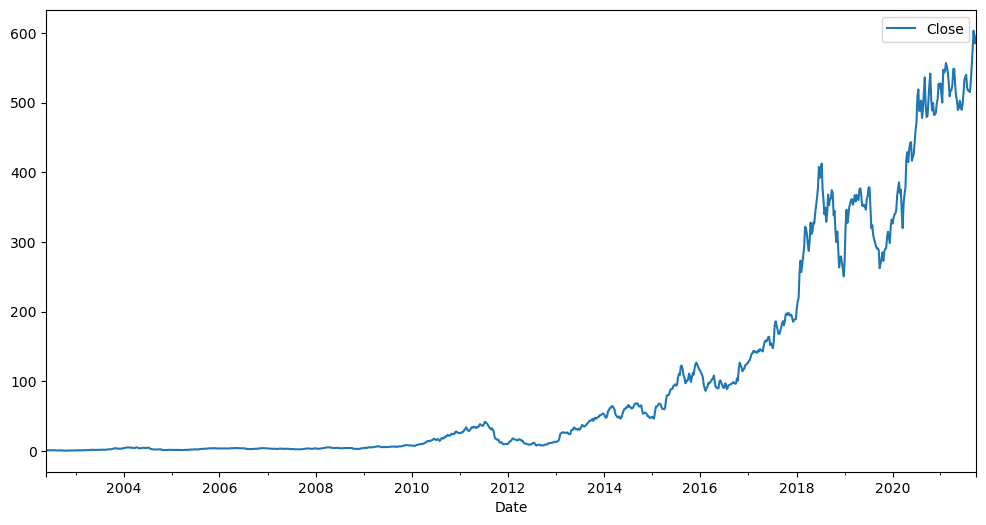

In [33]:
close_upsample.plot()

<Axes: ylabel='Count'>

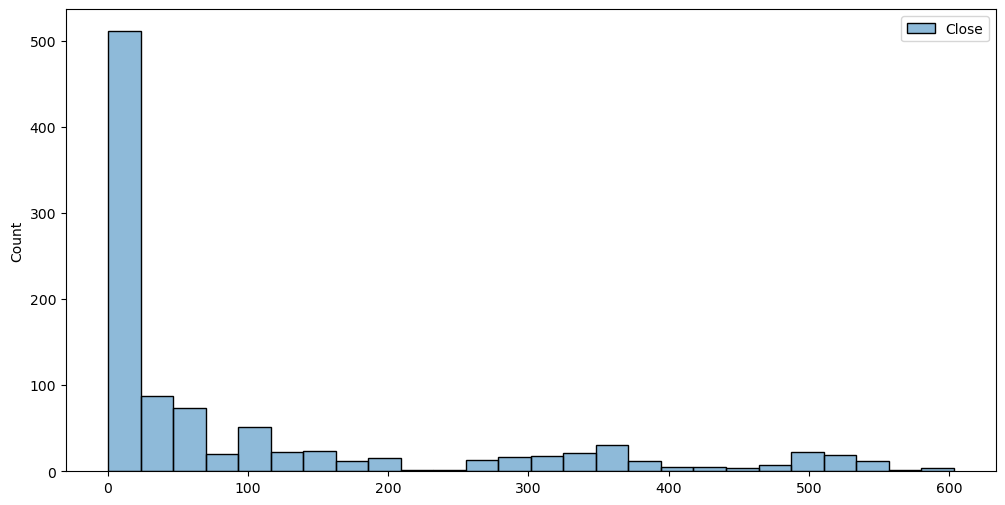

In [34]:
sns.histplot(close_upsample)

<Axes: ylabel='Close'>

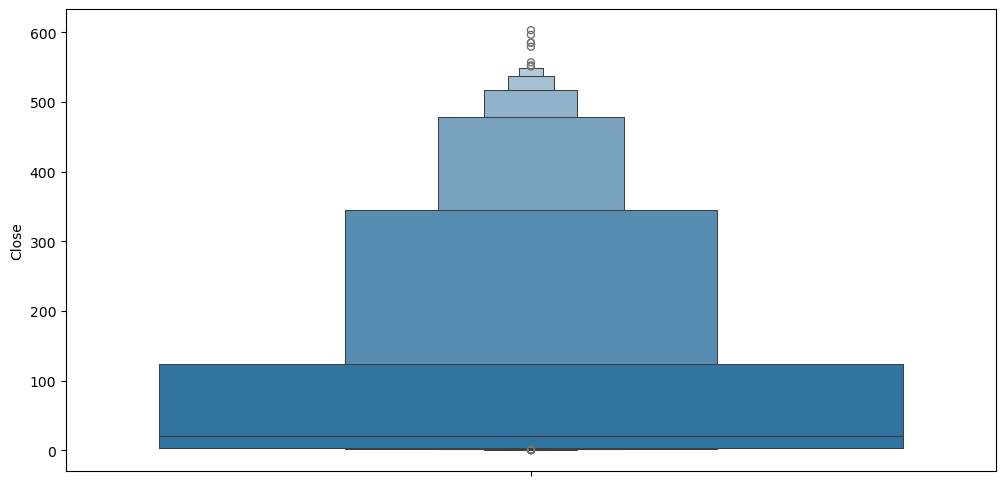

In [39]:
sns.boxenplot(close_upsample['Close'])

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

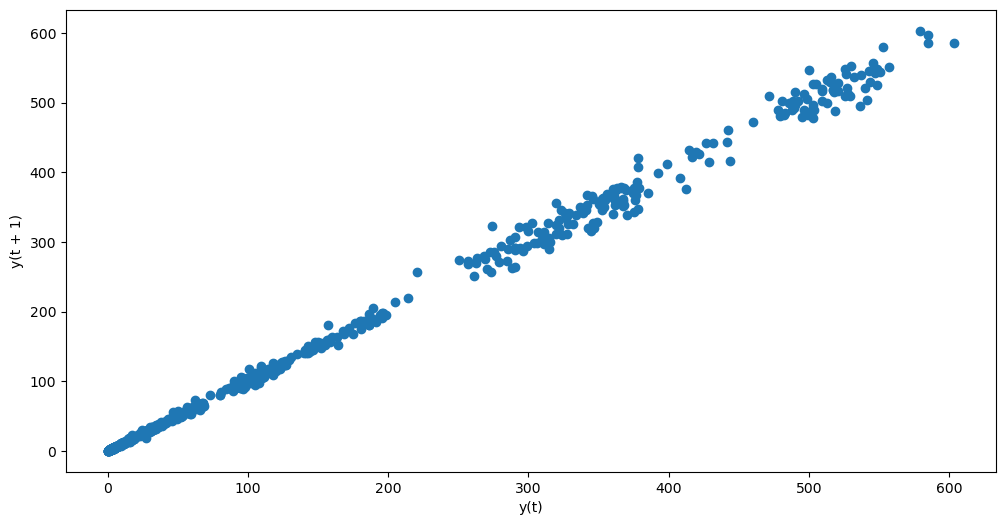

In [40]:
lag_plot(close_upsample)

In [16]:
def zscore(df,degree = 3):
    data = df.copy()
    data['z-score'] = (data - data.mean()) / data.std()
    outliers = data[(data['z-score'] <= -degree) | (data['z-score'] >= degree) ]
    return outliers,data

In [17]:
threshold = 2.5
outliers, transformed = zscore(close_upsample,threshold)

In [18]:
outliers.drop(['z-score'],axis=1,inplace=True)
outliers

C:\Users\u610601\AppData\Local\Temp\ipykernel_11900\216244668.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers.drop(['z-score'],axis=1,inplace=True)


,Close
Date,
2020-07-12,509.247998
2020-07-19,518.804004
2020-08-09,502.835999
2020-08-30,515.416010
2020-09-06,536.150000
2020-09-13,495.385998
2020-10-04,502.946002
2020-10-11,526.481994
2020-10-18,541.616003


In [19]:
transformed.drop(['z-score'],axis =1,inplace =True)
transformed

,Close
Date,
2002-05-26,1.203215
2002-06-02,1.113143
2002-06-09,1.138857
2002-06-16,1.094429
2002-06-23,0.944143
...,...
2021-09-05,579.304004
2021-09-12,603.145996
2021-09-19,585.153992


In [20]:
clean_df = transformed[~transformed['Close'].isin(outliers['Close'])]
clean_df

,Close
Date,
2002-05-26,1.203215
2002-06-02,1.113143
2002-06-09,1.138857
2002-06-16,1.094429
2002-06-23,0.944143
...,...
2020-11-22,482.886005
2020-11-29,485.443994
2021-05-16,489.356000


In [21]:
df = clean_df.copy()

<Axes: xlabel='Date'>

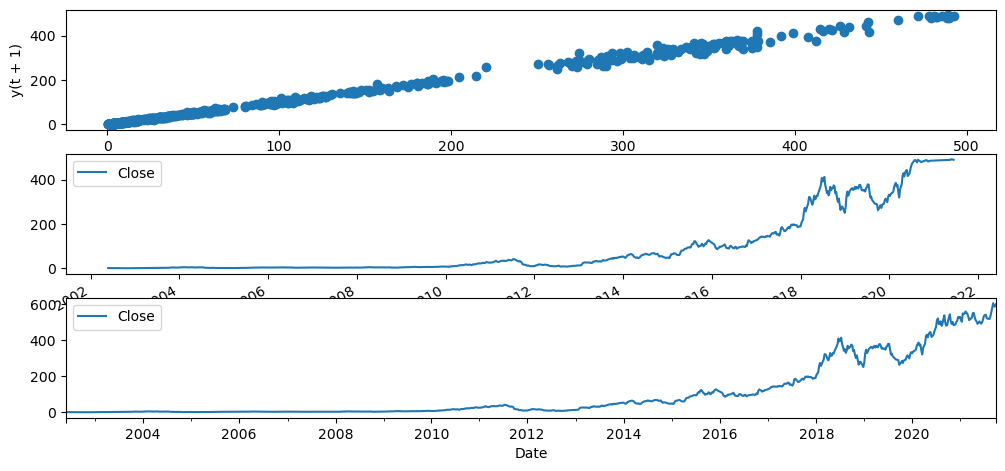

In [66]:
fig,ax = plt.subplots(3,1,figsize= (12,6))
lag_plot(clean_df,ax=ax[0])
clean_df.plot(ax=ax[1])
close_upsample.plot(ax=ax[2])

In [90]:
df

,Close
Date,
2002-05-26,1.203215
2002-06-02,1.113143
2002-06-09,1.138857
2002-06-16,1.094429
2002-06-23,0.944143
...,...
2020-11-22,482.886005
2020-11-29,485.443994
2021-05-16,489.356000


# Stationary check

In [22]:
def print_results(output, test='adf'):    
    pval = output[1]
    test_score = output[0]
    lags = output[2]    
    decision = 'Non-Stationary'
    if test == 'adf':
        critical = output[4]
        if pval < 0.05:
            decision = 'Stationary'
    elif test=='kpss':
        critical = output[3]
        if pval >= 0.05:
            decision = 'Stationary'            
    output_dict = {
    'Test Statistic': test_score,
    'p-value': pval,
    'Numbers of lags': lags,
    'decision': decision
    }
    for key, value in critical.items():
        output_dict["Critical Value (%s)" % key] = value
       
    return pd.Series(output_dict, name=test) 

In [98]:
adf = adfuller(df['Close'].diff(1).dropna())


In [99]:
print_results(adf)

Test Statistic           -6.252715
p-value                        0.0
Numbers of lags                 21
decision                Stationary
Critical Value (1%)      -3.437356
Critical Value (5%)      -2.864633
Critical Value (10%)     -2.568417
Name: adf, dtype: object

In [23]:
def check_stationarity(df):
    kps = kpss(df)
    adf = adfuller(df)
    
    kpss_pv, adf_pv = kps[1], adf[1]
    kpssh, adfh = 'Stationary', 'Non-stationary'
    
    if adf_pv < 0.05:
        # Reject ADF Null Hypothesis
        adfh = 'Stationary'
    if kpss_pv < 0.05:
        # Reject KPSS Null Hypothesis
        kpssh = 'Non-stationary'
    return (kpssh, adfh)  

# Splittng the data

In [24]:
def split(data,index):
    l = len(data)
    idx = round(l * (1 - index))
    train , test = data  [:idx],data[idx:]
    print(f'train : {len(train)}, test: {len(test)}')
    return train,test

idx = 0.2
train , test = split(df,idx)

train : 767, test: 192


# Stationary Check

In [25]:
def stationary_check(df):
    s= 'Non-Stationary'
    result = adfuller(df)[1:3]
    if result[0] < 0.05:
        s = 'Stationary'
    print(f'{s} \t p-value: {result[0]}\t lags: {result[1]}')
    return (s,result[0])


stationary_check(df)
print(stationary_check(train))

Non-Stationary 	 p-value: 0.9984031642618431	 lags: 22
Non-Stationary 	 p-value: 0.9968862376930063	 lags: 20
('Non-Stationary', 0.9968862376930063)


# Get the best model

In [26]:
def get_best_model(score,c = 'AIC'):
    initial_score = score[0][c]
    best_model = 0
    for k,v in score.items():
        if v[c] < initial_score:
            initial_score = v[c]
            best_model = k
    print(f'best_model: {best_model} with lowest {c} score: {initial_score}')
    return score[best_model]['model']

# Combinator

In [27]:
def combinator(items):
    combo = [i for i in product(*items)]
    return combo

# Plotting the forecast

In [28]:
def plot_forecast(model, start,train,test):
    forcast = pd.DataFrame(model.forecast(test.shape[0]),index=test.index)
    ax = train.loc[start:].plot(style = '--')
    test.plot(ax=ax)
    forcast.plot(ax=ax,style = '-.')
    ax.legend(['orig_train', 'orig_test', 'forecast'])
    plt.show()

# ACF & PACF

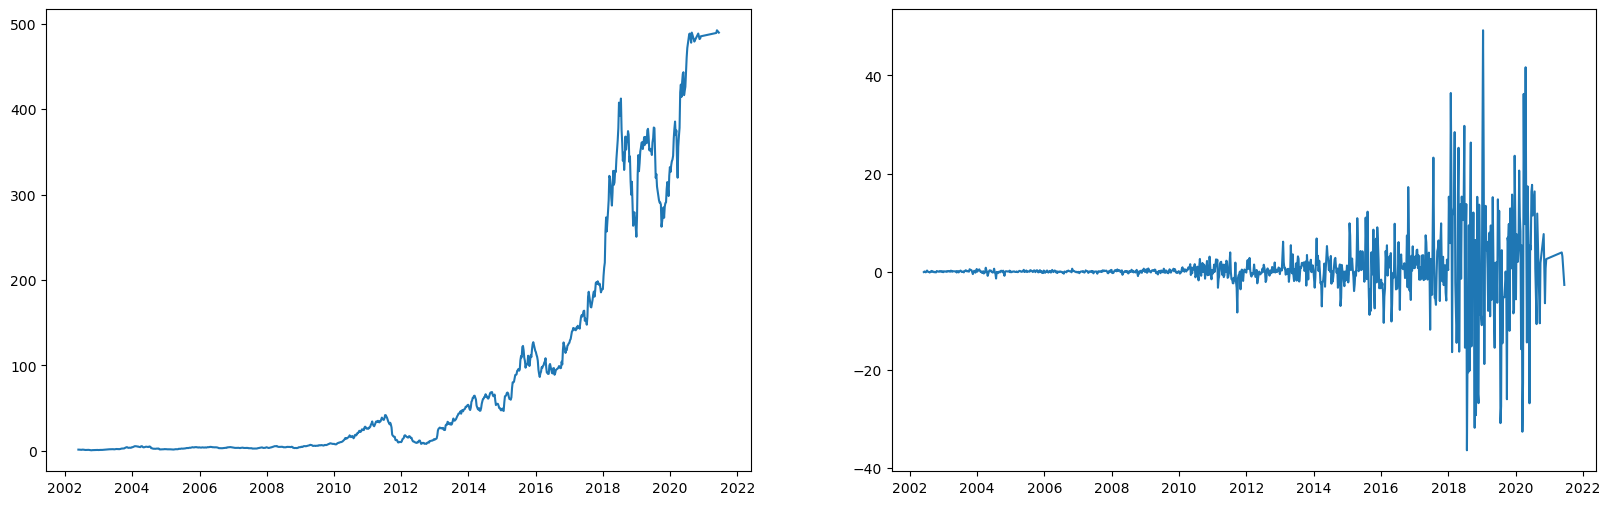

In [105]:
fig, ax = plt.subplots(1,2,figsize= (20,6))
ax[0].plot(df)
ax[1].plot(df.diff(1).dropna())
plt.show()

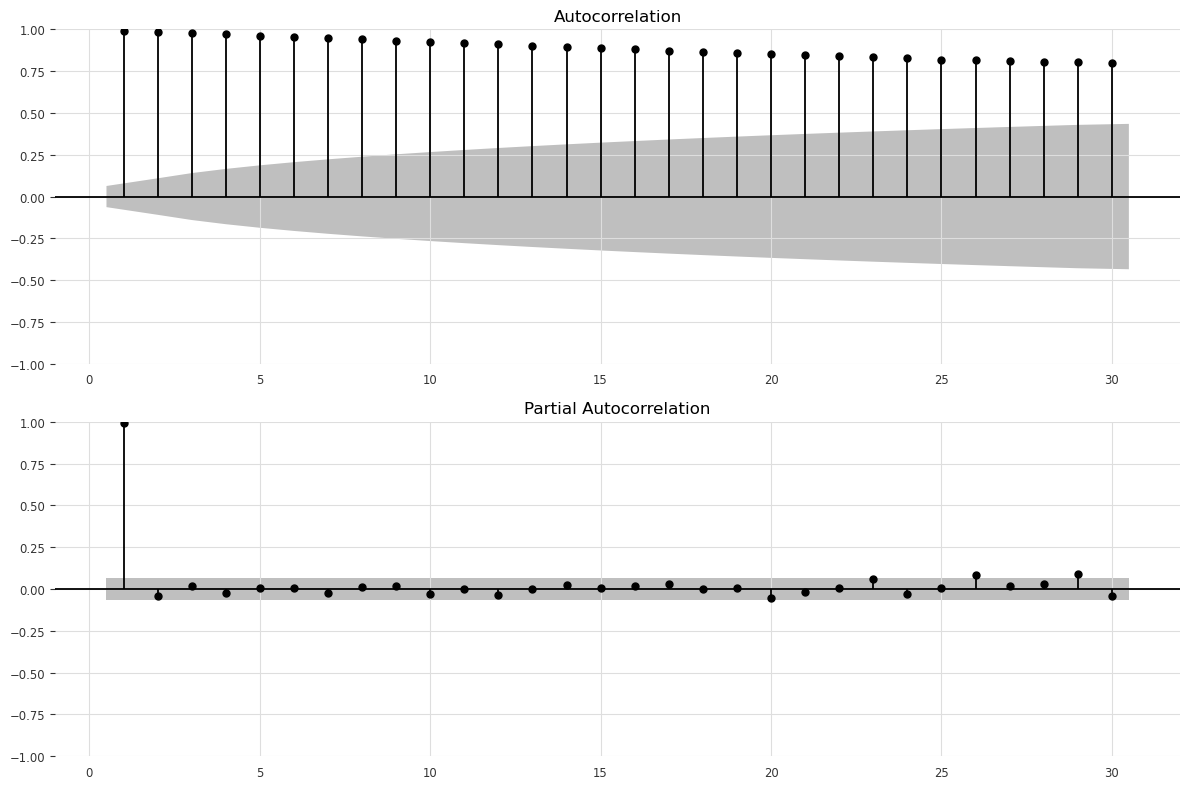

In [58]:
fig , ax = plt.subplots(2,1,figsize = (12,8))
plot_acf(df,zero=False,ax = ax[0])
plot_pacf(df,zero=False,ax=ax[1])
plt.tight_layout()
plt.show()

# Exponential Smoothing

In [24]:
model = ExponentialSmoothing(seasonal_periods=52)
ts = TimeSeries.from_dataframe(df.reset_index(), time_col=None, value_cols='Close', freq='W')

In [26]:
ts

<TimeSeries (DataArray) (time: 959, component: 1, sample: 1)>
array([[[1.20321450e+00]],

       [[1.11314300e+00]],

       [[1.13885700e+00]],

       [[1.09442860e+00]],

       [[9.44143000e-01]],

       [[9.74857000e-01]],

       [[1.19357160e+00]],

       [[1.19542840e+00]],

       [[1.13357160e+00]],

       [[1.06785740e+00]],

...

       [[4.89791998e+02]],

       [[4.79253998e+02]],

       [[4.81017999e+02]],

       [[4.88671991e+02]],

       [[4.82221997e+02]],

       [[4.82886005e+02]],

       [[4.85443994e+02]],

       [[4.89356000e+02]],

       [[4.92496008e+02]],

       [[4.89779999e+02]]])
Coordinates:
  * time       (time) int64 0 1 2 3 4 5 6 7 ... 951 952 953 954 955 956 957 958
  * component  (component) <U5 'Close'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None
    metadata:           None

train : 767, test: 192


<Axes: xlabel='time'>

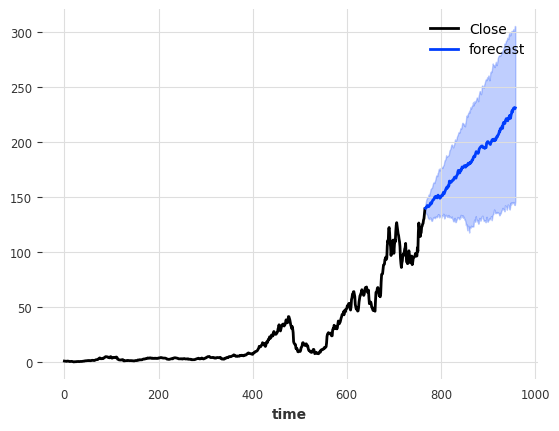

In [27]:
train, test = split(ts,0.2)
model.fit(train)
forecast = model.predict(len(test), num_samples=100)
train.plot()
forecast.plot(label='forecast', low_quantile=0.05, high_quantile=0.95)

In [28]:
model.model.summary()

Dep. Variable:,endog,No. Observations:,767
Model:,ExponentialSmoothing,SSE,3232.722
Optimized:,True,AIC,1215.401
Trend:,Additive,BIC,1475.380
Seasonal:,Additive,AICC,1225.068
Seasonal Periods:,52,Date:,"Fri, 18 Apr 2025"
Box-Cox:,False,Time:,18:46:39
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
smoothing_trend,0.0070758,beta,True


# Seasonal ARIMA

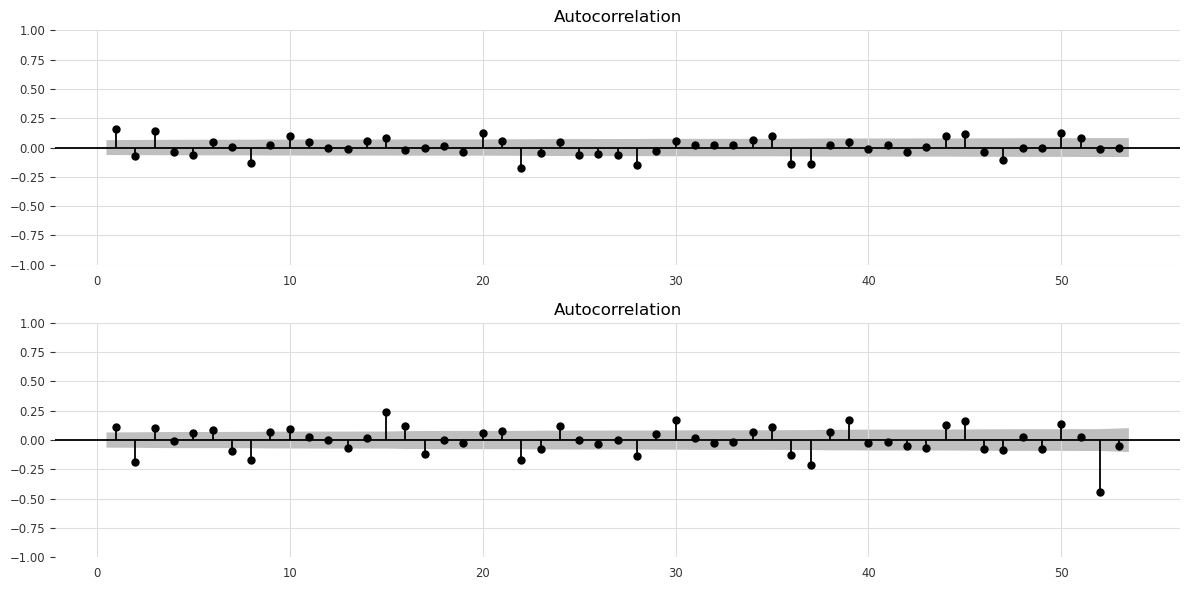

In [43]:
plt.rcParams['figure.figsize'] =  (12,6)
fig,ax = plt.subplots(2,1)
plot_acf(df.diff(1).dropna(),lags=53,zero=False,ax=ax[0])
plot_acf(df.diff(52).diff(1).dropna(),lags=53,zero= False,ax = ax[1])
plt.tight_layout()
plt.show()

In [44]:
# every 15 lags has seasonal

In [62]:
train,test = split(df,0.2)
sarima = SARIMAX(train,order = (2,1,1),seasonal_order=(2,1,1,52))
model_sarima = sarima.fit(disp=0)

train : 767, test: 192


C:\Anaconda3-2024.06\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Anaconda3-2024.06\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Anaconda3-2024.06\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda3-2024.06\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


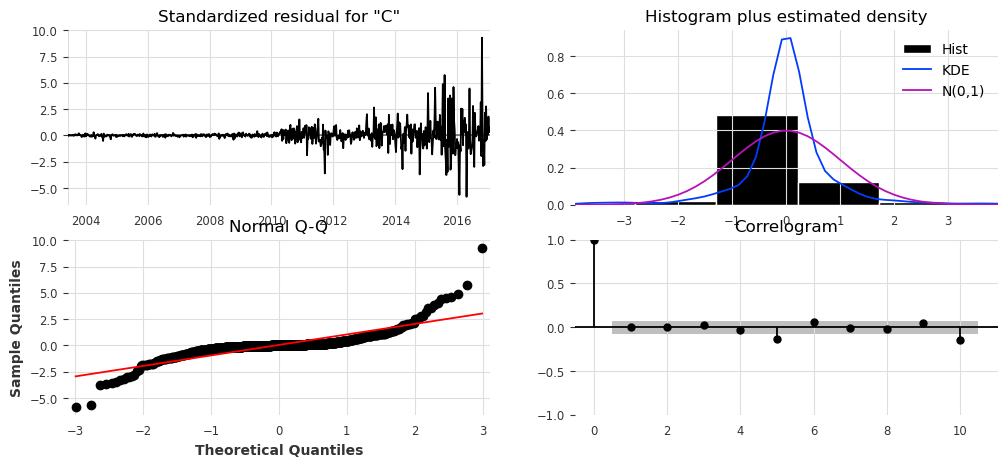

In [63]:
model_sarima.plot_diagnostics(figsize=(12,5))
plt.show()

In [64]:
model_sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                  767
Model:             SARIMAX(2, 1, 1)x(2, 1, 1, 52)   Log Likelihood               -1586.242
Date:                            Fri, 18 Apr 2025   AIC                           3186.484
Time:                                    19:51:21   BIC                           3218.481
Sample:                                05-26-2002   HQIC                          3198.842
                                     - 01-29-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0750      0.354     -0.212      0.832      -0.768       0.618
ar.L2          0.0631      0.111      0.569      0.570      -0.154       0.280
ma.L1          0.3748      0.353      1.062      0.288      -0.317       1.067
ar.S.L52      -0.1329      0.065     -2.047      0.041      -0.260      -0.006
ar.S.L104     -0.0345      0.068     -0.506      0.613      -0.168       0.099
ma.S.L52      -0.7692      0.058    -13.312      0.000      -0.882      -0.656
sigma2         4.5806      0.102     44.785      0.000       4.380       4.781
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             10244.52
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):             279.92   Skew:                             1.25
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

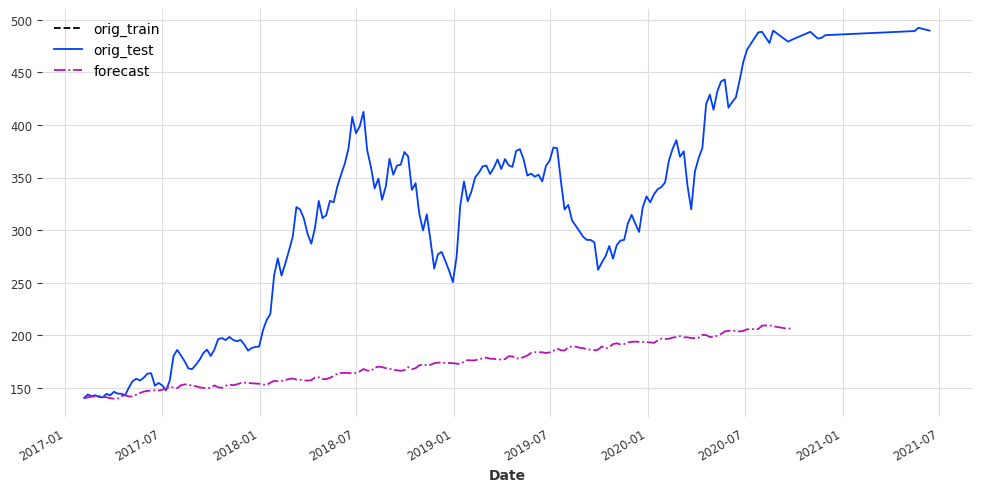

In [66]:
plot_forecast(model_sarima,'2019-01',train,test)

In [69]:
P_ns, D_ns, Q_ns = [list(range(3))] * 3
P_s,D_s,Q_s = [list(range(2))] * 3
vals = combinator([P_ns,D_ns,Q_ns,P_s,D_s,Q_s])
score = {}
for i, (p,d,q,P,D,Q) in enumerate(vals):
    if i % 15 ==0:
        print(f'Running model #{i} using SARIMA({p},{d},{q})({P},{D},{Q},12)')
        m = SARIMAX(train, order=(p,d,q),seasonal_order=(P,D,Q,52),enforce_stationarity=False)
        res = m.fit(disp =0)
        y = test.values.ravel()
        y_hat = res.forecast(steps= len(y))
        score[i] = {'non-seasonal order': (p,d,q),
                'seasonal order': (P, D, Q),
                'AIC':res.aic, 
                'AICc': res.aicc,
                'BIC': res.bic,
                'RMSPE': np.sqrt(mean_squared_error(y,y_hat)) / np.mean(y),
                'RMSE' : root_mean_squared_error(y,y_hat),
                'MAPE' : mean_absolute_error(y,y_hat)/np.mean(np.abs(y)) * 100,
                'model': res}
        
best_m = get_best_model(score, 'AIC')
best_m

Running model #0 using SARIMA(0,0,0)(0,0,0,12)
Running model #15 using SARIMA(0,0,1)(1,1,1,12)


C:\Anaconda3-2024.06\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Anaconda3-2024.06\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Anaconda3-2024.06\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Anaconda3-2024.06\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Anaconda3-2024.06\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  wa

Running model #30 using SARIMA(0,1,0)(1,1,0,12)


C:\Anaconda3-2024.06\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Anaconda3-2024.06\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


Running model #45 using SARIMA(0,1,2)(1,0,1,12)


C:\Anaconda3-2024.06\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Anaconda3-2024.06\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


Running model #60 using SARIMA(0,2,1)(1,0,0,12)


C:\Anaconda3-2024.06\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Anaconda3-2024.06\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


Running model #75 using SARIMA(1,0,0)(0,1,1,12)


C:\Anaconda3-2024.06\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Anaconda3-2024.06\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


Running model #90 using SARIMA(1,0,2)(0,1,0,12)


C:\Anaconda3-2024.06\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Anaconda3-2024.06\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


Running model #105 using SARIMA(1,1,1)(0,0,1,12)


C:\Anaconda3-2024.06\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Anaconda3-2024.06\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


Running model #120 using SARIMA(1,2,0)(0,0,0,12)
Running model #135 using SARIMA(1,2,1)(1,1,1,12)


C:\Anaconda3-2024.06\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Anaconda3-2024.06\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Anaconda3-2024.06\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Anaconda3-2024.06\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


Running model #150 using SARIMA(2,0,0)(1,1,0,12)


C:\Anaconda3-2024.06\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Anaconda3-2024.06\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


Running model #165 using SARIMA(2,0,2)(1,0,1,12)


C:\Anaconda3-2024.06\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Anaconda3-2024.06\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Anaconda3-2024.06\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Anaconda3-2024.06\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Running model #180 using SARIMA(2,1,1)(1,0,0,12)


C:\Anaconda3-2024.06\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Anaconda3-2024.06\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


Running model #195 using SARIMA(2,2,0)(0,1,1,12)


C:\Anaconda3-2024.06\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Anaconda3-2024.06\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


Running model #210 using SARIMA(2,2,2)(0,1,0,12)


C:\Anaconda3-2024.06\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Anaconda3-2024.06\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


best_model: 135 with lowest AIC score: 2985.311997453553


In [70]:
best_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                  767
Model:             SARIMAX(1, 2, 1)x(1, 1, 1, 52)   Log Likelihood               -1487.656
Date:                            Fri, 18 Apr 2025   AIC                           2985.312
Time:                                    19:58:39   BIC                           3007.766
Sample:                                05-26-2002   HQIC                          2994.016
                                     - 01-29-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2782      0.022     12.370      0.000       0.234       0.322
ma.L1         -0.9999      0.124     -8.083      0.000      -1.242      -0.757
ar.S.L52      -0.2649      0.052     -5.090      0.000      -0.367      -0.163
ma.S.L52      -0.7058      0.043    -16.551      0.000      -0.789      -0.622
sigma2         5.0186      0.586      8.570      0.000       3.871       6.166
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):              6912.04
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):             248.60   Skew:                             0.97
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

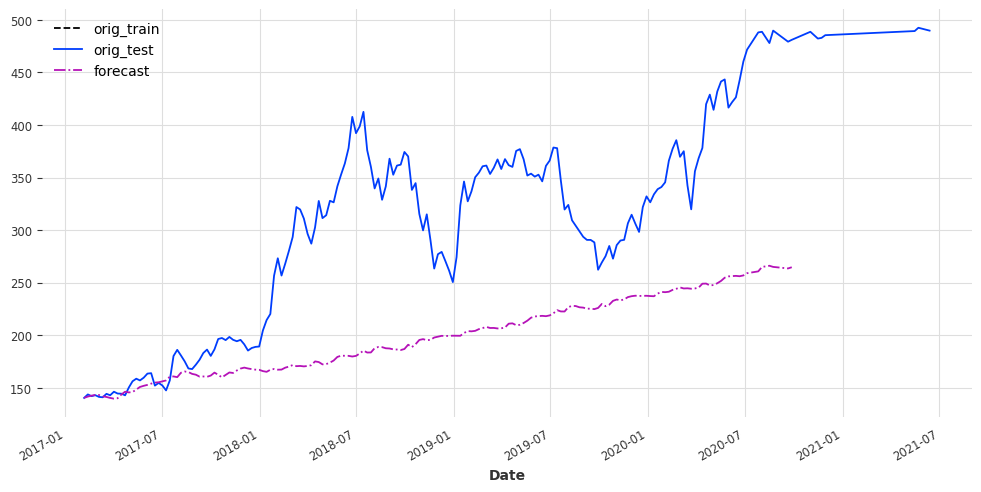

In [71]:
plot_forecast(best_m,'2019-01',train,test)

# Auto Arima

In [20]:
auto_model = pm.auto_arima(train, seasonal=True, m = 52, test='adf',stepwise=True)
auto_model.summary()

C:\Users\u610601\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\u610601\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\u610601\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\u610601\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\u610601\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  767
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -1628.715
Date:                Fri, 18 Apr 2025   AIC                           3263.430
Time:                        20:10:51   BIC                           3277.353
Sample:                    05-26-2002   HQIC                          3268.790
                         - 01-29-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1819      0.102      1.781      0.075      -0.018       0.382
ma.L1          0.3005      0.018     16.279      0.000       0.264       0.337
sigma2         4.1145      0.077     53.620      0.000       3.964       4.265
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             10466.94
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):             193.85   Skew:                             1.58
Prob(H) (two-sided):                  0.00   Kurtosis:                        20.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\Users\u610601\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\u610601\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


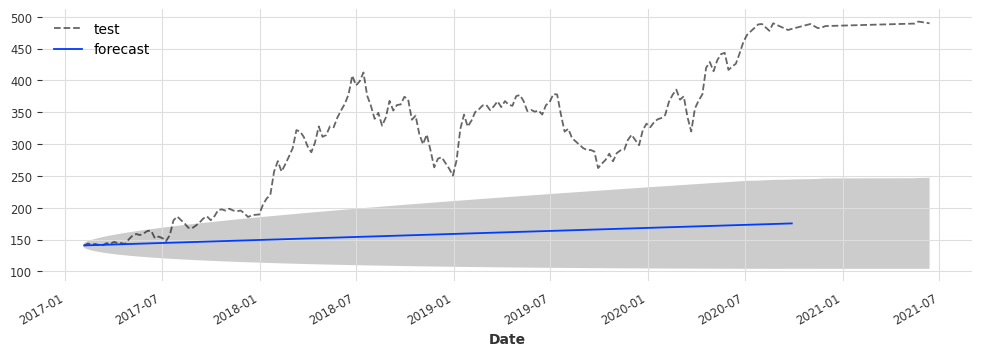

In [21]:
n = test.shape[0]
forecast, confidence_interval = auto_model.predict(n_periods=n,return_conf_int=True)
lower_ci,upper_ci = zip(*confidence_interval)
index = test.index
ax = test.plot(style = '--',alpha =0.6,figsize = (12,4))
pd.Series(forecast,index=index).plot(style='-',ax=ax)
plt.fill_between(index,lower_ci,upper_ci,alpha=0.2)
plt.legend(['test', 'forecast'])
plt.show()


# Prophet

In [22]:
df

,Close
Date,
2002-05-26,1.203215
2002-06-02,1.113143
2002-06-09,1.138857
2002-06-16,1.094429
2002-06-23,0.944143
...,...
2020-11-22,482.886005
2020-11-29,485.443994
2021-05-16,489.356000


In [24]:
df_prophet = df.reset_index()
df_prophet.rename({'Date':'ds','Close':'y'},axis=1,inplace=True)
df_prophet

,ds,y
0,2002-05-26,1.203215
1,2002-06-02,1.113143
2,2002-06-09,1.138857
3,2002-06-16,1.094429
4,2002-06-23,0.944143
...,...,...
954,2020-11-22,482.886005
955,2020-11-29,485.443994
956,2021-05-16,489.356000
957,2021-05-23,492.496008


In [25]:
train_prophet,test_prophet = split(df_prophet,0.15)

train : 815, test: 144


In [31]:
model = Prophet().fit(train_prophet)
model

20:31:40 - cmdstanpy - INFO - Chain [1] start processing
20:31:41 - cmdstanpy - INFO - Chain [1] done processing


In [32]:
Future = model.make_future_dataframe(periods = len(test),freq = 'W')

In [33]:
forecast = model.predict(Future)
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [34]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2002-05-26,1.233128,-10.455067,11.848117,1.233128,1.233128,0.284648,0.284648,0.284648,0.284648,0.284648,0.284648,0.0,0.0,0.0,1.517776
1,2002-06-02,1.242884,-9.886701,12.887034,1.242884,1.242884,0.937263,0.937263,0.937263,0.937263,0.937263,0.937263,0.0,0.0,0.0,2.180147
2,2002-06-09,1.252639,-9.854300,13.373884,1.252639,1.252639,0.970588,0.970588,0.970588,0.970588,0.970588,0.970588,0.0,0.0,0.0,2.223227
3,2002-06-16,1.262394,-10.144268,13.056192,1.262394,1.262394,0.394431,0.394431,0.394431,0.394431,0.394431,0.394431,0.0,0.0,0.0,1.656825
4,2002-06-23,1.272149,-10.411120,12.522141,1.272149,1.272149,-0.323777,-0.323777,-0.323777,-0.323777,-0.323777,-0.323777,0.0,0.0,0.0,0.948372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,2021-08-08,301.142066,279.771594,323.656016,282.382763,318.627699,1.617605,1.617605,1.617605,1.617605,1.617605,1.617605,0.0,0.0,0.0,302.759671
1003,2021-08-15,301.822512,280.986341,324.656661,282.915914,319.445256,1.205317,1.205317,1.205317,1.205317,1.205317,1.205317,0.0,0.0,0.0,303.027829
1004,2021-08-22,302.502958,281.440896,325.569286,283.458156,320.305193,0.877339,0.877339,0.877339,0.877339,0.877339,0.877339,0.0,0.0,0.0,303.380296
1005,2021-08-29,303.183404,282.144971,325.530364,284.009195,321.143351,0.688308,0.688308,0.688308,0.688308,0.688308,0.688308,0.0,0.0,0.0,303.871711


In [35]:
fave_cols = ['ds','yhat','yhat_lower','yhat_upper']


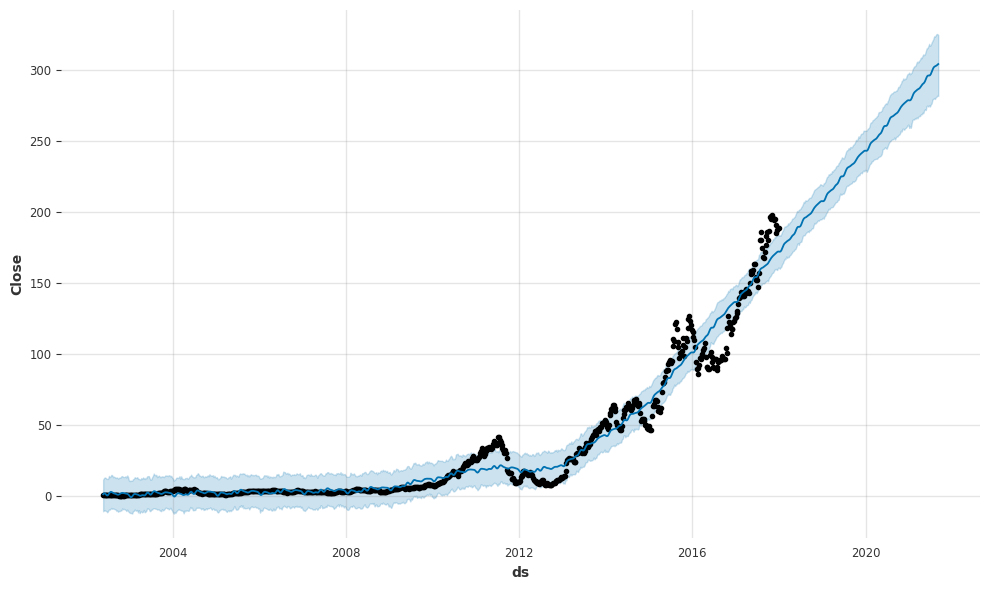

In [36]:
model.plot(forecast,ylabel = 'Close')
plt.show()

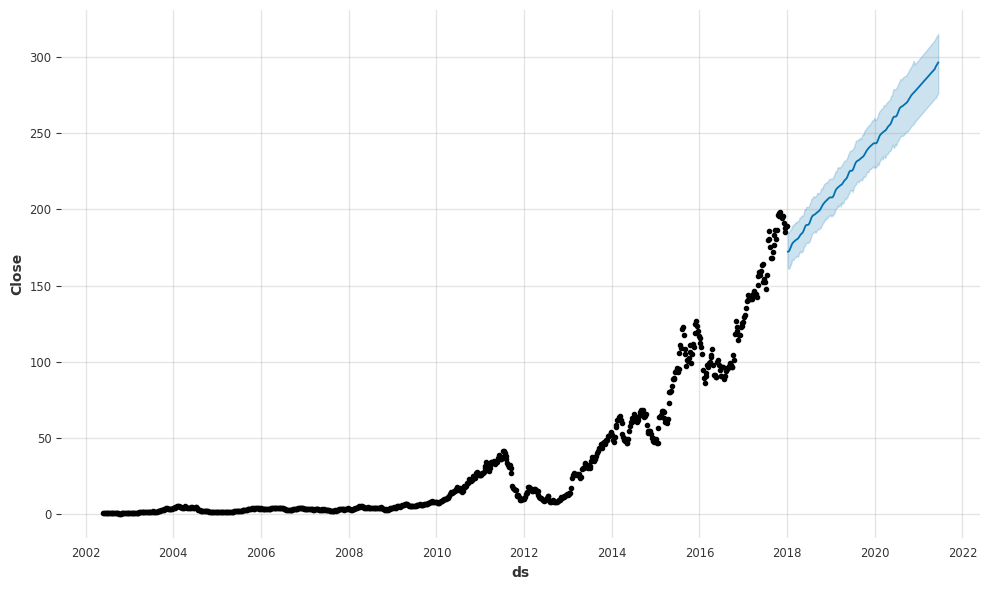

In [37]:
predicted = model.predict(test_prophet)
model.plot(predicted,ylabel='Close')
plt.show()

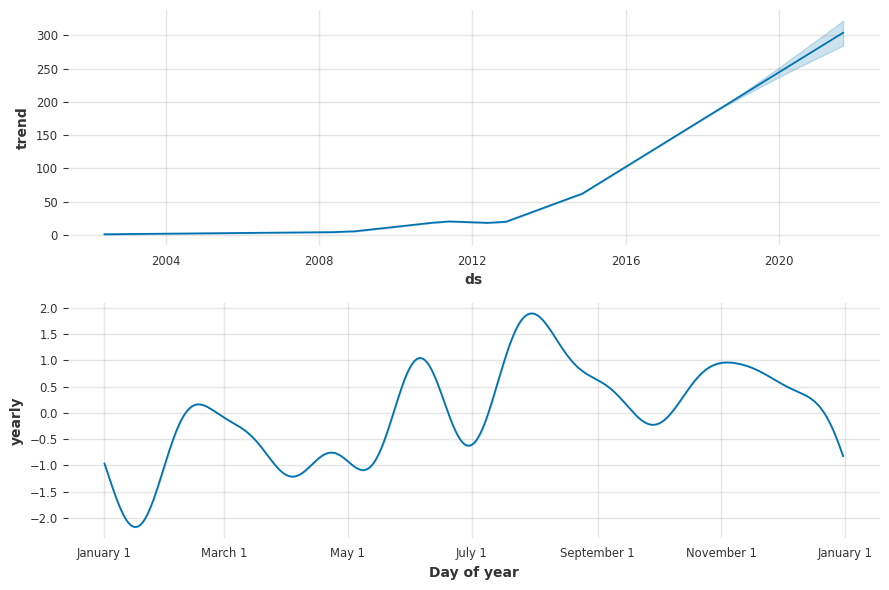

In [38]:
model.plot_components(forecast)
plt.show()

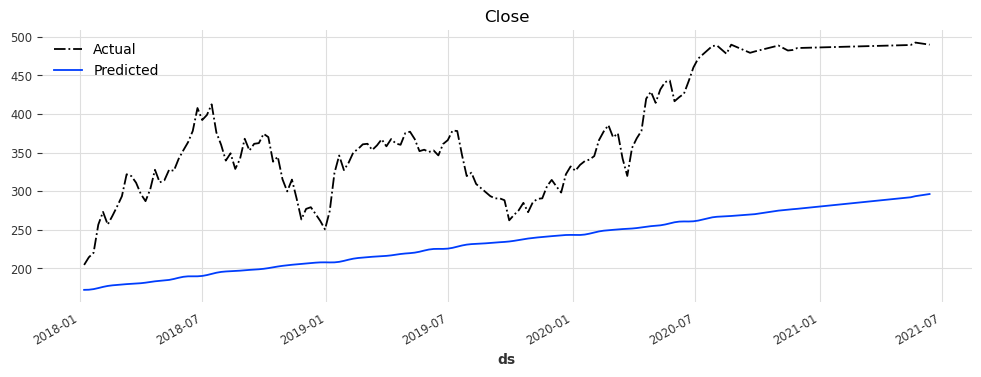

In [39]:
ax = test_prophet.plot(x='ds',y='y',label = 'Actual',style = '-.',figsize=(12,4))
predicted.plot(x='ds',y='yhat',label='Predicted',ax=ax)
plt.title('Close')
plt.show()

# VAR 

In [31]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000.0
2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800.0
2002-05-27,1.213571,1.232143,1.157143,1.157143,1.157143,6609400.0
2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400.0
2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800.0
...,...,...,...,...,...,...
2021-09-24,592.500000,592.979980,583.640015,592.390015,592.390015,2124800.0
2021-09-27,587.950012,593.580017,576.929993,592.640015,592.640015,2504700.0
2021-09-28,589.000000,599.539978,580.159973,583.849976,583.849976,4431100.0


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

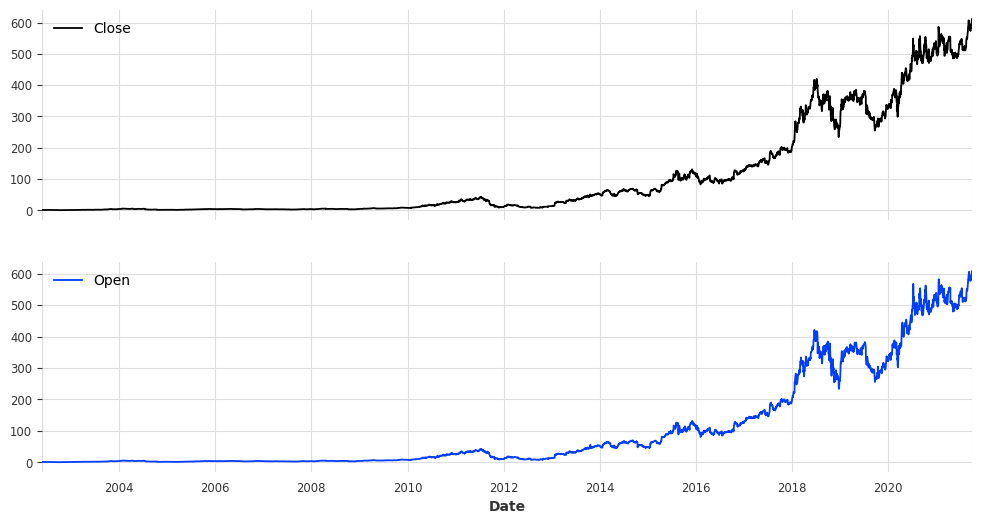

In [78]:
plt.rcParams['figure.figsize'] = (12,6)
df_var = pd.DataFrame({'Close':data['Close'],
             'Open': data['Open']})
df_var.plot(subplots=True)

In [79]:
df_var

,Close,Open
Date,,
2002-05-23,1.196429,1.156429
2002-05-24,1.210000,1.214286
2002-05-27,1.157143,1.213571
2002-05-28,1.157143,1.213571
2002-05-29,1.103571,1.164286
...,...,...
2021-09-24,592.390015,592.500000
2021-09-27,592.640015,587.950012
2021-09-28,583.849976,589.000000


In [80]:
df_var_resample = df_var.resample('w').mean()
df_var_resample

C:\Users\u610601\AppData\Local\Temp\ipykernel_11900\2703990632.py:1: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  df_var_resample = df_var.resample('w').mean()


,Close,Open
Date,,
2002-05-26,1.203215,1.185357
2002-06-02,1.113143,1.155571
2002-06-09,1.138857,1.130857
2002-06-16,1.094429,1.126286
2002-06-23,0.944143,0.963429
...,...,...
2021-09-05,579.304004,572.369995
2021-09-12,603.145996,599.569995
2021-09-19,585.153992,586.755994


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

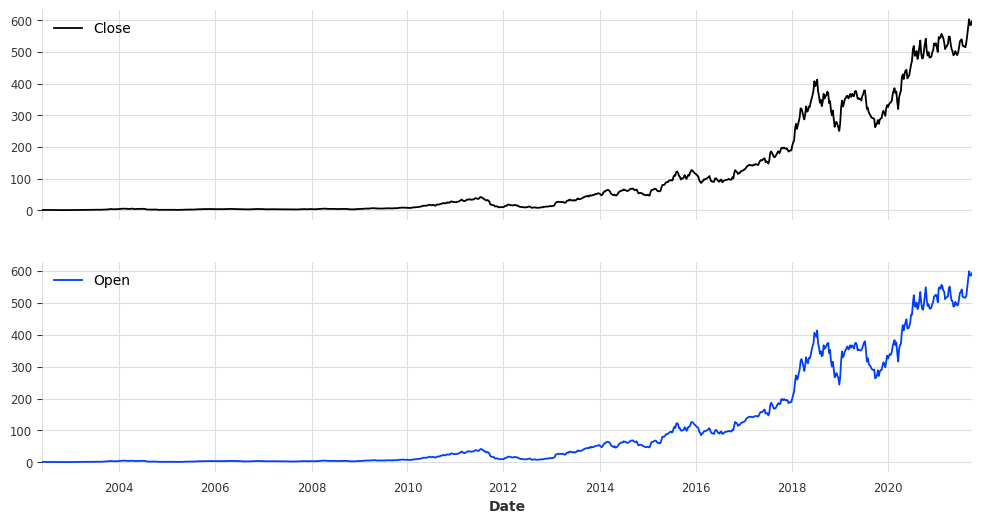

In [81]:
df_var_resample.plot(subplots = True)

In [83]:
check_stationarity(df_var_resample['Open'])

C:\Users\u610601\AppData\Local\Temp\ipykernel_11900\1016583420.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kps = kpss(df)


('Non-stationary', 'Non-stationary')

In [84]:
check_stationarity(df_var_resample['Close'])

C:\Users\u610601\AppData\Local\Temp\ipykernel_11900\1016583420.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kps = kpss(df)


('Non-stationary', 'Non-stationary')

Granger causality tests are implemented in statsmodels with the grangercausalitytests function, which performs four tests across each past lag. You can control this using the maxlag parameter. Granger causality tests are used to determine if past values from one variable influence the other variable.

grangercausalitytests examines the second column against the first column

In [85]:
model = VAR(df_var_resample)
res = model.select_order(maxlags=13)
res.summary()

,AIC,BIC,FPE,HQIC
0,10.95,10.96,5.684e+04,10.95
1,4.222,4.252,68.19,4.233
2,4.170,4.219*,64.72,4.189
3,4.173,4.242,64.90,4.199
4,4.170,4.258,64.70,4.203
5,4.138,4.246,62.66,4.179
6,4.105,4.233,60.63,4.153
7,4.099,4.247,60.30,4.155
8,4.079,4.247,59.11,4.143
9,4.077,4.264,59.00,4.148


In [87]:
granger = grangercausalitytests(df_var_resample[['Close','Open']],maxlag=12)
#The test is set for a maximum of 12 lags



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=272.6302, p=0.0000  , df_denom=1007, df_num=1
ssr based chi2 test:   chi2=273.4424, p=0.0000  , df=1
likelihood ratio test: chi2=241.9915, p=0.0000  , df=1
parameter F test:         F=272.6302, p=0.0000  , df_denom=1007, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=144.2789, p=0.0000  , df_denom=1004, df_num=2
ssr based chi2 test:   chi2=289.9948, p=0.0000  , df=2
likelihood ratio test: chi2=254.9047, p=0.0000  , df=2
parameter F test:         F=144.2789, p=0.0000  , df_denom=1004, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=85.4443 , p=0.0000  , df_denom=1001, df_num=3
ssr based chi2 test:   chi2=258.1254, p=0.0000  , df=3
likelihood ratio test: chi2=229.8171, p=0.0000  , df=3
parameter F test:         F=85.4443 , p=0.0000  , df_denom=1001, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=61.8047 , p=0.

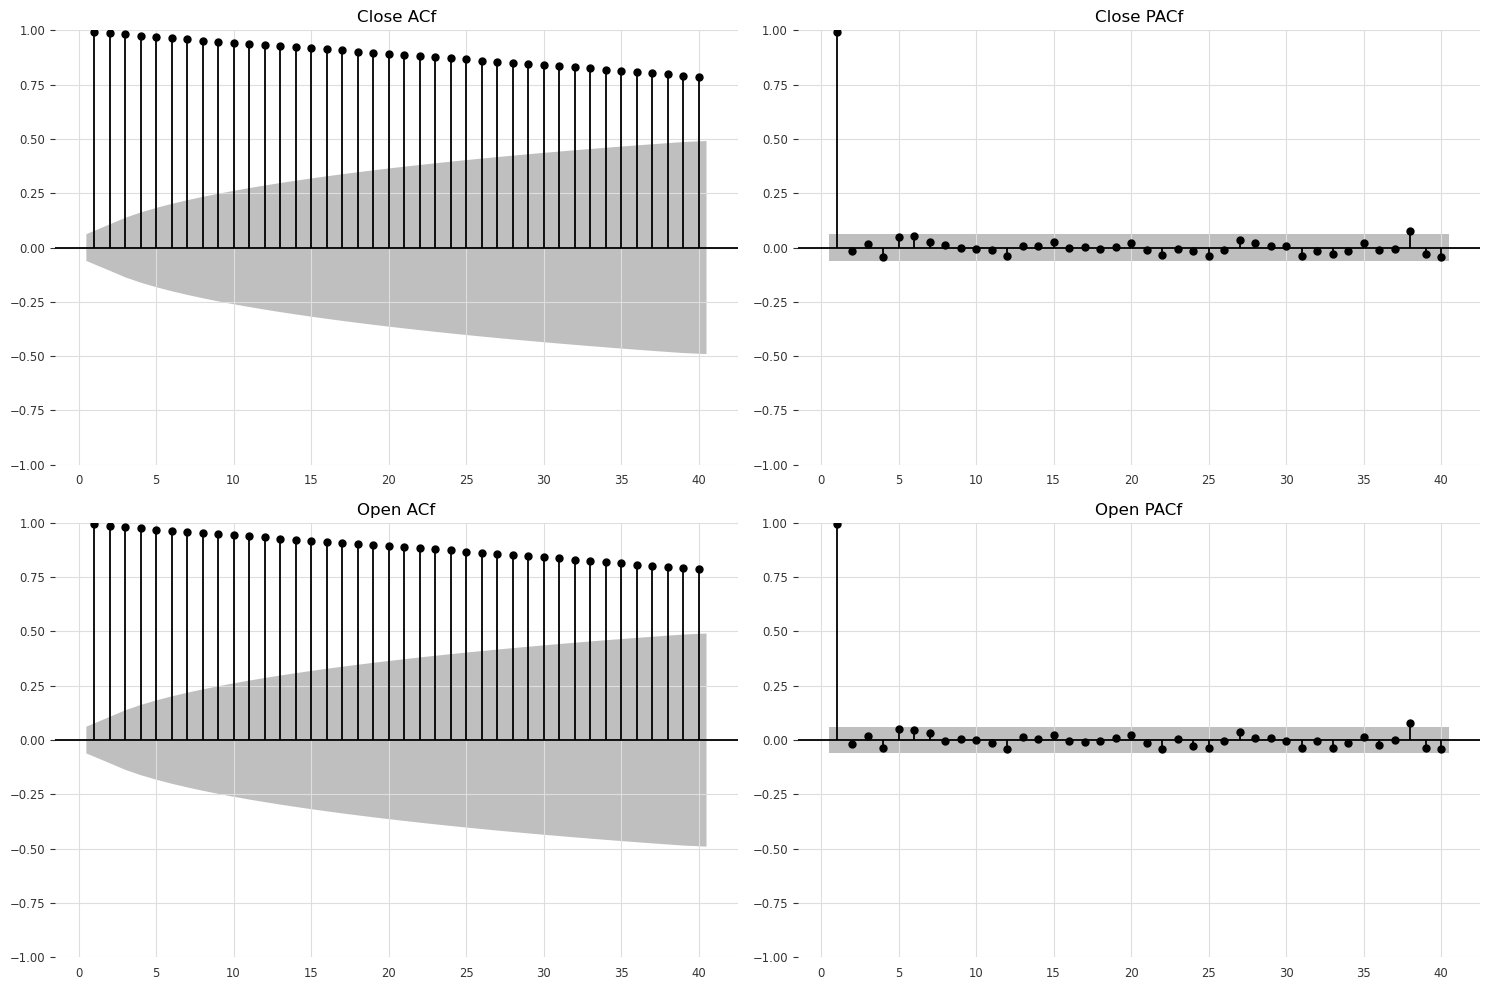

In [92]:
fig,ax = plt.subplots(2,2,figsize = (15,10))
plot_acf(df_var_resample['Close'],zero=False,lags=40,ax=ax[0,0],title = 'Close ACf')
plot_pacf(df_var_resample['Close'],zero=False,lags=40,ax=ax[0,1],title = 'Close PACf')
plot_acf(df_var_resample['Open'],zero=False,lags=40,ax=ax[1,0],title='Open ACf')
plot_pacf(df_var_resample['Open'],zero=False,lags =40,ax=ax[1,1],title = 'Open PACf')
plt.tight_layout()
plt.show()

In [93]:
# Scaling the data

In [94]:
train,test = split(df_var_resample,0.2)

train : 809, test: 202


In [96]:
train

,Close,Open
Date,,
2002-05-26,1.203215,1.185357
2002-06-02,1.113143,1.155571
2002-06-09,1.138857,1.130857
2002-06-16,1.094429,1.126286
2002-06-23,0.944143,0.963429
...,...,...
2017-10-22,197.397998,198.191998
2017-10-29,195.402002,194.832001
2017-11-05,198.425998,198.464001


In [98]:
sc= StandardScaler()
train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)
train_sc = pd.DataFrame(train_sc,index=train.index,columns=train.columns)
test_sc = pd.DataFrame(test_sc,index=test.index,columns=test.columns)

In [99]:
train_sc

,Close,Open
Date,,
2002-05-26,-0.696619,-0.696833
2002-06-02,-0.698594,-0.697486
2002-06-09,-0.698030,-0.698028
2002-06-16,-0.699004,-0.698128
2002-06-23,-0.702300,-0.701701
...,...,...
2017-10-22,3.605948,3.624876
2017-10-29,3.562176,3.551168
2017-11-05,3.628492,3.630843


In [100]:
model = VAR(endog=train_sc,freq='W')
res = model.select_order(maxlags=12)
res.summary()

,AIC,BIC,FPE,HQIC
0,-9.081,-9.069,0.0001138,-9.076
1,-15.67,-15.63*,1.571e-07,-15.65
2,-15.67,-15.61,1.561e-07,-15.65
3,-15.67,-15.59,1.567e-07,-15.64
4,-15.67,-15.57,1.561e-07,-15.63
5,-15.70,-15.57,1.526e-07,-15.65
6,-15.73,-15.58,1.470e-07,-15.67
7,-15.74,-15.57,1.455e-07,-15.68
8,-15.75,-15.55,1.445e-07,-15.67
9,-15.76,-15.53,1.437e-07,-15.67


In [101]:
res.selected_orders

{'aic': 12, 'bic': 1, 'hqic': 12, 'fpe': 12}

In [102]:
final_result = model.fit(maxlags=12,ic='aic')
final_result.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 19, Apr, 2025
Time:                     20:12:29
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -15.5018
Nobs:                     797.000    HQIC:                  -15.6827
Log likelihood:           4082.71    FPE:                1.38079e-07
AIC:                     -15.7955    Det(Omega_mle):     1.29808e-07
--------------------------------------------------------------------
Results for equation Close
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const             0.005107         0.001810            2.821           0.005
L1.Close          2.755089         0.192100           14.342           0.000
L1.Open          -1.638092         0.218262           -7.505           0.000

In [103]:
lag_order = final_result.k_ar
lag_order

12

In [104]:
train_sc[-lag_order:]

,Close,Open
Date,,
2017-09-03,3.049275,3.014900
2017-09-10,3.152961,3.134982
2017-09-17,3.292436,3.272746
2017-09-24,3.364498,3.352640
2017-10-01,3.232962,3.270332
2017-10-08,3.369411,3.318462
2017-10-15,3.585159,3.616145
2017-10-22,3.605948,3.624876
2017-10-29,3.562176,3.551168


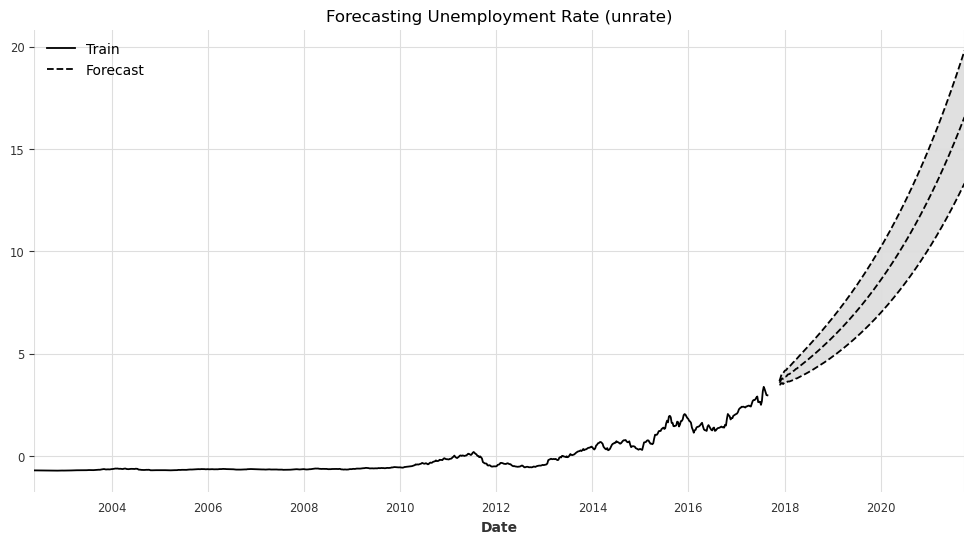

In [106]:
past_y = train_sc[-lag_order:].values
n = test_sc.shape[0]
forecast,lower,upper = final_result.forecast_interval(past_y,steps=n)
idx = test.index; style = 'k--'
ax = train_sc.iloc[:-lag_order, 1].plot(style='k')
pred_forecast  = pd.Series(forecast[:, 1], index=idx).plot(ax=ax, style=style)
pred_lower = pd.Series(lower[:, 1], index=idx).plot(ax=ax, style=style)
pred_upper  = pd.Series(upper[:, 1], index=idx).plot(ax=ax, style=style)
plt.fill_between(idx, lower[:,1], upper[:,1], alpha=0.12)
plt.title('Forecasting Unemployment Rate (unrate)')
plt.legend(['Train','Forecast'])
plt.show()